# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Polynomial model generalization exercises

Tasks: 

1. Evaluate infulence of the training data size on model generalization. 

2. Evaluate infulence of data noise on the model generalization. 

3. Generalize the polynomial model by simplification from high degree (top-down approach).


In [33]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

from sklearn.preprocessing import PolynomialFeatures



### Sample data

In [34]:
# Generate data 
def fun(x, noise):
    """Underlying function"""
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

# Generate training & testing data
def train_test_data(n_samples, noise_factor): 
    """Function to generate training and testing sets"""
    
    # train 
    np.random.seed(0)
    X_train = np.sort(np.random.rand(n_samples))
    noise_train = np.random.rand(n_samples) * noise_factor
    y_train = fun(X_train, noise_train) 
    X_train = X_train.reshape(-1, 1)
    
    # test 
    X_test = np.sort(np.random.rand(n_samples))
    noise_test = np.random.rand(n_samples) * noise_factor
    y_test = fun(X_test, noise_test)
    X_test = X_test.reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test

In [35]:
# prepare data 
n_samples = 10
noise_factor = 0.9

X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [8]:
# Underlaying function
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

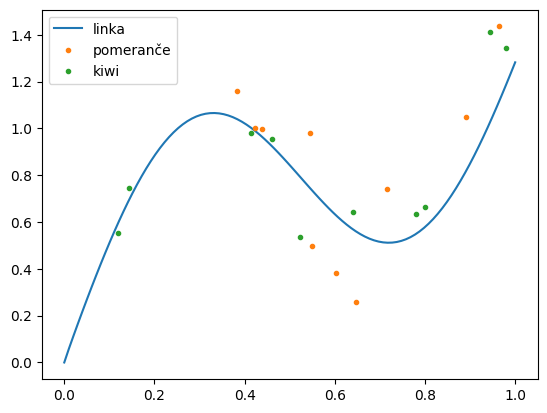

In [40]:
# Plot the data and underlaying function 
plt.plot(X_fun, y_fun) 
plt.plot(X_train, y_train, ".") #orange
plt.plot(X_test, y_test,".") #zelena
plt.legend(["linka","pomeranče", "kiwi"]) #linka je ti k ničemu !!! jen pro ilustraci

In [41]:
# Fit polynomial model (degree = 10)
poly = PolynomialFeatures(degree=10, include_bias=False)

x_cool = poly.fit_transform(X_train) # transformuji do ndarray
#type(my_model)
#my_model


In [48]:
# Evaluate the model - training error 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(x_cool, y_train) #TADY učím model (ANIČKOOOOOO) - jmenuje se linreg


LinearRegression()

In [54]:
pred_y = linreg.predict(x_cool) # predikuje y-ové hodnoty, pak můžu porovnat s y_train, bylo by super, aby tyto hodnoty nbyly úplně jiné od y_train, 
#predikovaná y pro trénovací data
pred_y
trining_err = mean_squared_error(y_train,pred_y)
trining_err
#trining_err
#type(pred)

5.791178724127119e-14

In [55]:
# Test error 
#linreg.fit(my_model, y_test)
#pred_t = linreg.predict()
x_cool_test = poly.fit_transform(X_test)
pred_y_test = linreg.predict(x_cool_test)

test_err = mean_squared_error(y_test, pred_y_test)
test_err # vyjde šílenost - model je overfitted

13867580384.629923

In [ ]:
# How well is the model generlized? 

(-1.0, 1.0)

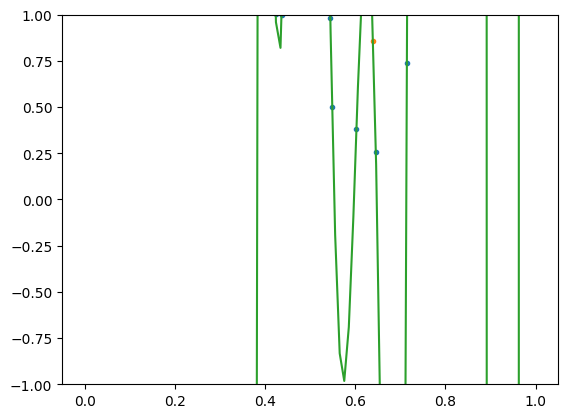

In [61]:
# Plot the model with the data? 
plt.plot(X_train, pred_y,".")
plt.plot(X_test, pred_y_test, ".")

x_plot = np.linspace(0,1,100)
plot_features = poly.fit_transform(x_plot.reshape(-1,1))
y_plot_feat = linreg.predict(plot_features)
plt.plot(x_plot, y_plot_feat)
plt.ylim(-1,1)
plt.scatter()

### **Exercise 1:** Evaluate the infulence of the data size on model generalization
* Increse the parameter `n_samples` from 10 to 50, 100, 200, and 500
* What is the effect of training data size on its model performance while using model of higher degree than needed? 
* How importan is to have enough samples? 

In [ ]:
# set size of the samples
# train model 
# evaluate model  
noise_factor = 0.9
degree = 10
n_samples = 10 # update 
pass 

In [ ]:
# Plot the model
pass 

In [ ]:
# What is the effect of incresing sample size on model generalization? 
# Is there any use of the polynomial model for this use case?

### **Exercise 2:** Evaluate the infulence of noise on the model generalization
* Decrese the noise parameter `noise_factor` from 0.9 to 0.5, and 0.1
* What is the effect of noise in the training data on model generalization? 
* Next, increase  the parameter `n_samples` from to 200 and keep `noise_factor` at 10% = 0.1. How does the model look?  

In [ ]:
noise_factor = 0.9
degree = 10
n_samples = 20 

# run the model 
pass

In [ ]:
# Plot the model
pass 

In [ ]:
# Evaluate the results 

### **Exercise 3:** Simplify the model for better generalization
* Decrese the degree of polynomial of model`deg` from 10 to reasonable number, so the difference between testing and training model is minimized. 


In [ ]:
noise_factor = 0.5
degree = 10
n_samples = 30 
# run the model 
pass 

In [ ]:
# Plot the model
pass

In [ ]:
# Evaluate the results